# Метод k-ближайших соседей (K-Nearest modelbors, KNNs)

---

**Источники:**

[Метод k-ближайших соседей](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9)

[k-nearest modelbors algorithm](https://en.wikipedia.org/wiki/K-nearest_modelbors_algorithm)

[GPU based Dynamic k-Nearest modelbours](https://github.com/artifabrian/dynamic-knn-gpu)

[Intelligent feature selection with modified K-nearest modelbor for kidney transplantation prediction](https://link.springer.com/article/10.1007/s42452-019-1329-z)

[1.6. Nearest modelbor](https://scikit-learn.org/stable/modules/modelbors.html)

[K Nearest modelbor Classification – Animated Explanation for Beginners](https://machinelearningknowledge.ai/k-nearest-modelbor-classification-simple-explanation-beginners/)

[The k-Nearest modelbors (kNN) Algorithm in Python](https://realpython.com/knn-python/)

[9 Distance Measures in Data Science](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa)

[Метод k взвешенных ближайших соседей (пример)](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k_%D0%B2%D0%B7%D0%B2%D0%B5%D1%88%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9_%28%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%29)

[Метод k-ближайших соседей (K-nearest neighbor)](https://wiki.loginom.ru/articles/k-nearest-neighbor.html)

[Метод ближайших соседей](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B5%D0%B3%D0%BE_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B0)

[Building a k-Nearest-Neighbors (k-NN) Model with Scikit-learn](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a)

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import sklearn

sklearn.__version__

'0.24.1'

## Загрузка данных

[Источник (teleCust1000t)](https://www.kaggle.com/damlaerek0/telecust1000t).

In [8]:
df = pd.read_csv('./../../data/teleCust1000t.csv')

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = '{:.2f}'.format

# отобразить первые 5 и последние 5 строк
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.00,4,5,0.00,0,2,1
1,3,11,33,1,7,136.00,5,5,0.00,0,6,4
2,3,68,52,1,24,116.00,1,29,0.00,1,2,3
3,2,33,33,0,12,33.00,2,0,0.00,1,1,1
4,2,23,30,1,9,30.00,1,2,0.00,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.00,3,0,0.00,1,3,1
996,1,7,34,0,2,22.00,5,5,0.00,1,1,1
997,3,67,59,0,40,944.00,5,33,0.00,1,1,4
998,3,70,49,0,18,87.00,2,22,0.00,1,1,3


## Метод k-ближайших соседей (k-nearest modelbors algorithm)

**Метод k-ближайших соседей (англ. k-nearest modelbors algorithm, k-NN, KNNs) — метрический алгоритм для автоматической классификации объектов или регрессии.**

<img src="images/KNNs_Diagram.png" width=400>

В случае использования метода для **классификаци** объект присваивается тому **классу, который является наиболее распространённым среди k соседей данного элемента**, классы которых уже известны.

**В процессе обучения алгоритм просто запоминает все векторы признаков и соответствующие им метки классов.** При работе с реальными данными, т.е. наблюдениями, метки класса которых неизвестны, вычисляется расстояние между вектором нового наблюдения и ранее запомненными. Затем выбирается k ближайших к нему векторов, и новый объект относится к классу, которому принадлежит большинство из них.

В случае использования метода для **регрессии**, объекту присваивается **среднее значение по k ближайшим** к нему объектам, значения которых уже известны.

Данные требуют **нормализации**. При кластерном анализе есть два основных способа нормализации данных: минимакс-нормализация и Z-нормализация.

Некоторые значимые атрибуты могут быть важнее остальных, поэтому для каждого атрибута может быть задан в соответствие определённый **вес** (например вычисленный с помощью тестовой выборки и оптимизации ошибки отклонения). Вариант по умолчанию: все точки в каждом районе имеют одинаковый вес.

**На практике оптимальное значение параметра k определяют по критерию скользящего контроля (cross-validation), чаще всего — методом исключения объектов по одному (leave-one-out cross-validation).**

<img src="images/knns_ex1.png" width=600>

<img src="images/KNNs-Classification.gif" width=600>

<img src="images/knns_ex2.png" width=700>

### Расстрояния

Алгоритм может быть применим к выборкам с большим количеством атрибутов (многомерным). Для этого перед применением нужно определить функцию расстояния. Классический пример функции **расстрояния — евклидова метрика**, но **`sklearn`** по умолчанию использует **метрику Минковского с параметром `p=2`**, то есть по сути то же самое евклидово расстояние, но с большей гибкостью настроек (не только евклидово).

**Евклидова метрика (евклидово расстояние)** — метрика в евклидовом пространстве — **расстояние между двумя точками евклидова пространства, вычисляемое по теореме Пифагора**. Е**вклидова метрика — наиболее естественная функция расстояния**, возникающая в геометрии, отражающая интуитивные свойства расстояния между точками.

**Расстояние Минковского (метрика Минковского)** — параметрическая метрика на евклидовом пространстве, которую можно рассматривать как обобщение евклидова расстояния и [расстояния городских кварталов](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2). Названа в честь немецкого математика Германа Минковского, впервые систематически изучившего данное семейство функций расстояния.

<img src="images/distances.png" width=500>

### Достоинства

- Простота реализации.
- Классификацию, проведенную данным алгоритмом, легко интерпретировать путём предъявления пользователю нескольких ближайших объектов.
- Метод показывает хорошие результаты.

### Недостатки
- Неэффективный расходу памяти и чрезмерное усложнение решающего правила вследствии необходимости хранения обучающей выборки целиком.
- Высокая вычислительная трудоемкость.


### Предварительная обработка (pre-processing) и выбор (selection) данных

In [9]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

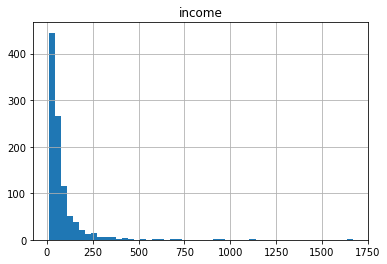

In [10]:
df.hist(column='income', bins=50)

In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [12]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
y = df['custcat'].values

In [13]:
from sklearn import preprocessing

# нормализация
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Обучение модели (Train)

[sklearn.modelbors.KmodelborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.modelbors.KmodelborsClassifier.html)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
model

KNeighborsClassifier(n_neighbors=4)

In [16]:
y_predicted = model.predict(X_test)
y_predicted

array([4, 3, 4, 3, 2, 2, 1, 4, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 4, 3, 3, 2,
       2, 2, 1, 1, 3, 1, 4, 2, 4, 3, 1, 1, 2, 1, 1, 1, 3, 2, 4, 1, 1, 1,
       3, 1, 2, 1, 1, 2, 3, 3, 4, 2, 1, 1, 1, 3, 2, 1, 3, 4, 1, 1, 4, 2,
       3, 3, 3, 1, 1, 3, 4, 4, 1, 1, 2, 3, 4, 1, 3, 1, 1, 3, 2, 2, 1, 2,
       2, 4, 3, 1, 2, 1, 3, 4, 2, 1, 4, 2, 3, 3, 2, 4, 3, 1, 3, 4, 1, 3,
       1, 3, 1, 1, 1, 2, 1, 4, 4, 1, 1, 2, 2, 4, 1, 2, 2, 1, 1, 3, 1, 2,
       1, 2, 2, 1, 4, 1, 2, 4, 1, 1, 1, 1, 3, 4, 3, 1, 3, 3, 1, 4, 1, 1,
       1, 2, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2, 4, 1, 4, 3, 2, 3, 1, 3, 1, 1,
       2, 1, 2, 4, 4, 3, 1, 1, 1, 4, 3, 1, 4, 1, 2, 2, 3, 1, 2, 2, 1, 1,
       4, 1])

### Оценка качества модели (Evaluation)

In [17]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predicted))

Train set Accuracy:  0.57
Test set Accuracy:  0.285


### Обучение модели (Train)

In [18]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_predicted=model.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_predicted)
    std_acc[n-1]=np.std(y_predicted==y_test)/np.sqrt(y_predicted.shape[0])

mean_acc

array([0.25 , 0.255, 0.28 , 0.285, 0.295, 0.295, 0.325, 0.33 , 0.315,
       0.31 , 0.31 , 0.29 , 0.285, 0.295, 0.275, 0.305, 0.295, 0.285,
       0.28 , 0.28 , 0.285, 0.27 , 0.26 , 0.3  , 0.285, 0.29 , 0.29 ,
       0.31 , 0.325])

### Оценка качества модели (Evaluation)

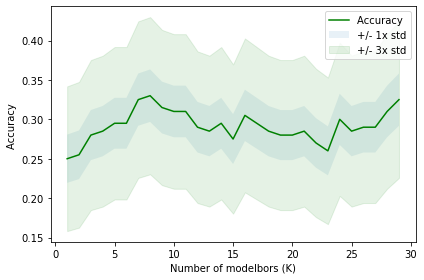

In [19]:
plt.plot(range(1, Ks), mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1x std','+/- 3x std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of modelbors (K)')
plt.tight_layout()
plt.show()

### Обучение модели (Train)

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 30)}
model = KNeighborsClassifier()
knn_gscv = GridSearchCV(model, param_grid, cv=5)
knn_gscv

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [21]:
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [22]:
knn_gscv.best_params_

{'n_neighbors': 28}

In [23]:
knn_gscv.best_score_

0.39625